In [38]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
from cadet import Cadet
Cadet.cadet_path = '/Users/hoangnguyen/cadet-core/cadet/bin/cadet-cli'

# CSTR

In [39]:
n_comp = 1
tau = 1
V = 1
Q = 1

# Setting up the model
model = Cadet()
model.root.input.model.nunits = 3

In [40]:
# Unit operations
model.root.input.model.unit_000.unit_type = 'INLET'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

# CSTR
model.root.input.model.unit_001.unit_type = 'CSTR'
model.root.input.model.unit_001.ncomp = n_comp
model.root.input.model.unit_001.init_volume = V
model.root.input.model.unit_001.init_c = [0.0]

# Outlet
model.root.input.model.unit_002.unit_type = 'OUTLET'
model.root.input.model.unit_002.ncomp = n_comp

# Connections
model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = [
    0, 1, -1, -1, Q,
    1, 2, -1, -1, Q,
]

In [41]:
model.root.input.model.solver.gs_type = 1
model.root.input.model.solver.max_krylov = 0
model.root.input.model.solver.max_restarts = 10
model.root.input.model.solver.schur_safety = 1e-8

# Number of cores for parallel simulation
model.root.input.solver.nthreads = 1

# Tolerances for the time integrator
model.root.input.solver.time_integrator.abstol = 1e-6
model.root.input.solver.time_integrator.algtol = 1e-10
model.root.input.solver.time_integrator.reltol = 1e-6
model.root.input.solver.time_integrator.init_step_size = 1e-6
model.root.input.solver.time_integrator.max_steps = 1000000

In [42]:
# Auxiliary variable
c_step = [1]
t_cycle = 10

## Sections and Switches
model.root.input.solver.sections.nsec = 2
model.root.input.solver.sections.section_times = [0.0, t_cycle*0.3, t_cycle]
model.root.input.solver.sections.section_continuity = [0,]
model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

# Create pulse
model.root.input.model.unit_000.sec_000.const_coeff = 0
model.root.input.model.unit_000.sec_001.const_coeff = c_step

In [43]:
# Return data
model.root.input['return'].split_components_data = 0
model.root.input['return'].split_ports_data = 0
model.root.input['return'].unit_000.write_solution_bulk = 1
model.root.input['return'].unit_000.write_solution_inlet = 1
model.root.input['return'].unit_000.write_solution_outlet = 1

# Copy settings to the other unit operations
model.root.input['return'].unit_001 = model.root.input['return'].unit_000

In [44]:
# Running simulation
model.filename = 'rtd-cstr-2.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


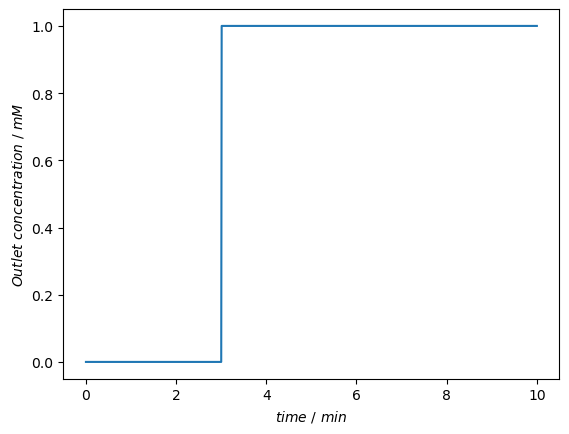

In [45]:
# Plotting the results of the inlet
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_001.solution_inlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

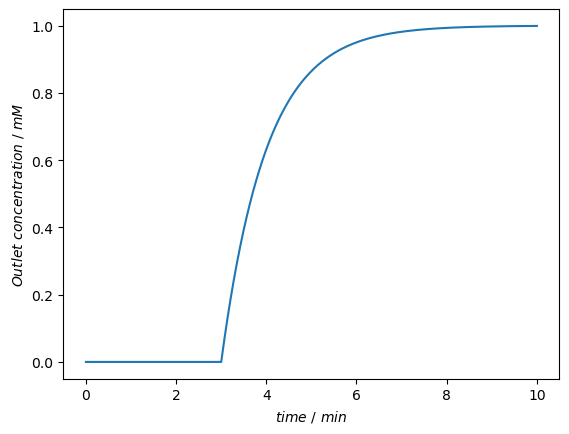

In [46]:
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_001.solution_outlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

# PFR

In [47]:
n_comp = 1
tau = 5
length = 1
Q = 1

# Setting up the model
model = Cadet()
model.root.input.model.nunits = 3

In [48]:
# Inlet
model.root.input.model.unit_000.unit_type = 'INLET'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

# Tubular reactor
model.root.input.model.unit_001.unit_type = 'LUMPED_RATE_MODEL_WITHOUT_PORES'
model.root.input.model.unit_001.ncomp = n_comp
model.root.input.model.unit_001.col_length = length
model.root.input.model.unit_001.velocity = length/tau
model.root.input.model.unit_001.total_porosity = 1
model.root.input.model.unit_001.col_dispersion = 0
model.root.input.model.unit_001.init_c = [0.0,]

# Outlet
model.root.input.model.unit_002.unit_type = 'OUTLET'
model.root.input.model.unit_002.ncomp = n_comp

model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = [
    0, 1, -1, -1, Q,
    1, 2, -1, -1, Q,
]

In [49]:
model.root.input.model.solver.gs_type = 1
model.root.input.model.solver.max_krylov = 0
model.root.input.model.solver.max_restarts = 10
model.root.input.model.solver.schur_safety = 1e-8

# Number of cores for parallel simulation
model.root.input.solver.nthreads = 1

# Tolerances for the time integrator
model.root.input.solver.time_integrator.abstol = 1e-6
model.root.input.solver.time_integrator.algtol = 1e-10
model.root.input.solver.time_integrator.reltol = 1e-6
model.root.input.solver.time_integrator.init_step_size = 1e-6
model.root.input.solver.time_integrator.max_steps = 1000000

In [50]:
# Discretization
# Grid cells
model.root.input.model.unit_001.discretization.ncol = 100

# Bound states
model.root.input.model.unit_001.discretization.nbound = n_comp*[0.0]

# Other options
model.root.input.model.unit_001.discretization.use_analytic_jacobian = 1
model.root.input.model.unit_001.discretization.reconstruction = 'WENO'
model.root.input.model.unit_001.discretization.gs_type = 1
model.root.input.model.unit_001.discretization.max_krylov = 0
model.root.input.model.unit_001.discretization.max_restarts = 10
model.root.input.model.unit_001.discretization.schur_safety = 1.0e-8

# Weno options
model.root.input.model.unit_001.discretization.weno.boundary_model = 0
model.root.input.model.unit_001.discretization.weno.weno_eps = 1e-10
model.root.input.model.unit_001.discretization.weno.weno_order = 3

In [51]:
# Auxiliary variable
t_cycle = 10

model.root.input.model.unit_000.sec_000.const_coeff = [1]
model.root.input.model.unit_000.sec_000.lin_coeff = [0]

## Sections and Switches
model.root.input.solver.sections.nsec = 2
model.root.input.solver.sections.section_times = [0.0, t_cycle]
model.root.input.solver.sections.section_continuity = []

model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

In [52]:
# Return data
model.root.input['return'].split_components_data = 0
model.root.input['return'].split_ports_data = 0
model.root.input['return'].unit_000.write_solution_bulk = 1
model.root.input['return'].unit_000.write_solution_inlet = 1
model.root.input['return'].unit_000.write_solution_outlet = 1

# Copy settings to the other unit operations
model.root.input['return'].unit_001 = model.root.input['return'].unit_000

In [53]:
# Running simulation
model.filename = 'rtd-pfr-2.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


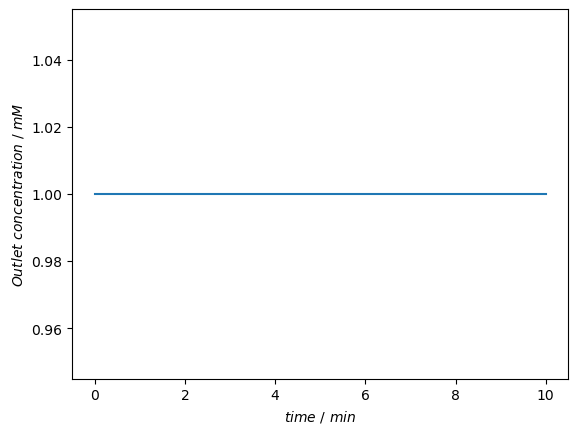

In [54]:
# Plotting the results of the inlet
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_001.solution_inlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

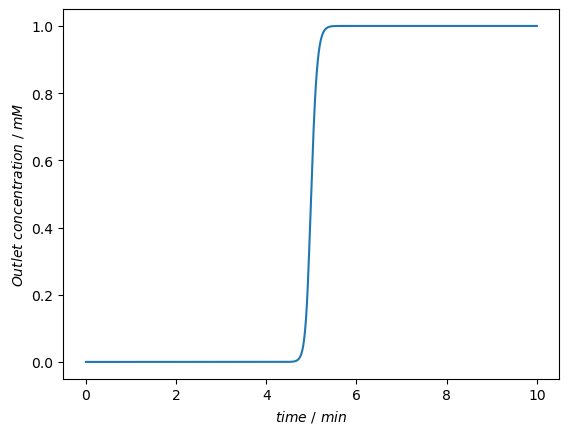

In [55]:
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_001.solution_outlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

# Bonus Exercise

In [56]:
# Setting up the model
n_comp = 1
model = Cadet()
model.root.input.model.nunits = 4

In [57]:
# CSTR
tau_cstr = 1
V = 1
Q = 1

# PFR
length = 1
tau_pfr = 5

In [68]:
# Unit operations
model.root.input.model.unit_000.unit_type = 'INLET'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

# CSTR
model.root.input.model.unit_001.unit_type = 'CSTR'
model.root.input.model.unit_001.ncomp = n_comp
model.root.input.model.unit_001.init_volume = V
model.root.input.model.unit_001.init_c = [0.0]

# PFR
model.root.input.model.unit_002.unit_type = 'LUMPED_RATE_MODEL_WITHOUT_PORES'
model.root.input.model.unit_002.ncomp = n_comp
model.root.input.model.unit_002.col_length = length
model.root.input.model.unit_002.velocity = length/tau_pfr
model.root.input.model.unit_002.total_porosity = 1
model.root.input.model.unit_002.col_dispersion = 0
model.root.input.model.unit_002.init_c = [0.0,]

# Outlet
model.root.input.model.unit_003.unit_type = 'OUTLET'
model.root.input.model.unit_003.ncomp = n_comp

model.root.input.model.connections.nswitches = 2
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = [
    0, 1, -1, -1, Q,
    1, 2, -1, -1, Q,
    2, 3, -1, -1, Q,
]

model.root.input.model.connections.switch_001.section = 1
model.root.input.model.connections.switch_001.connections = [
    0, 1, -1, -1, Q,
    1, 2, -1, -1, Q,
    2, 3, -1, -1, Q,
]

In [69]:
model.root.input.model.solver.gs_type = 1
model.root.input.model.solver.max_krylov = 0
model.root.input.model.solver.max_restarts = 10
model.root.input.model.solver.schur_safety = 1e-8

# Number of cores for parallel simulation
model.root.input.solver.nthreads = 1

# Tolerances for the time integrator
model.root.input.solver.time_integrator.abstol = 1e-6
model.root.input.solver.time_integrator.algtol = 1e-10
model.root.input.solver.time_integrator.reltol = 1e-6
model.root.input.solver.time_integrator.init_step_size = 1e-6
model.root.input.solver.time_integrator.max_steps = 1000000

In [70]:
# Discretization
# Grid cells
model.root.input.model.unit_002.discretization.ncol = 100

# Bound states
model.root.input.model.unit_002.discretization.nbound = n_comp*[0.0]

# Other options
model.root.input.model.unit_002.discretization.use_analytic_jacobian = 1
model.root.input.model.unit_002.discretization.reconstruction = 'WENO'
model.root.input.model.unit_002.discretization.gs_type = 1
model.root.input.model.unit_002.discretization.max_krylov = 0
model.root.input.model.unit_002.discretization.max_restarts = 10
model.root.input.model.unit_002.discretization.schur_safety = 1.0e-8

# Weno options
model.root.input.model.unit_002.discretization.weno.boundary_model = 0
model.root.input.model.unit_002.discretization.weno.weno_eps = 1e-10
model.root.input.model.unit_002.discretization.weno.weno_order = 3

In [71]:
# Auxiliary variable
c_step = [1]
t_cycle = 10

## Sections and Switches
model.root.input.solver.sections.nsec = 2
model.root.input.solver.sections.section_times = [0.0, t_cycle*0.5, t_cycle]
model.root.input.solver.sections.section_continuity = [0,]
model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

# Create pulse
model.root.input.model.unit_000.sec_000.const_coeff = 0
model.root.input.model.unit_000.sec_001.const_coeff = c_step

In [72]:
# Return data
model.root.input['return'].split_components_data = 0
model.root.input['return'].split_ports_data = 0
model.root.input['return'].unit_000.write_solution_bulk = 1
model.root.input['return'].unit_000.write_solution_inlet = 1
model.root.input['return'].unit_000.write_solution_outlet = 1

# Copy settings to the other unit operations
model.root.input['return'].unit_001 = model.root.input['return'].unit_000
model.root.input['return'].unit_002 = model.root.input['return'].unit_000
model.root.input['return'].unit_003 = model.root.input['return'].unit_000

In [73]:
# Running simulation
model.filename = 'rtd-cstr-pfr.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


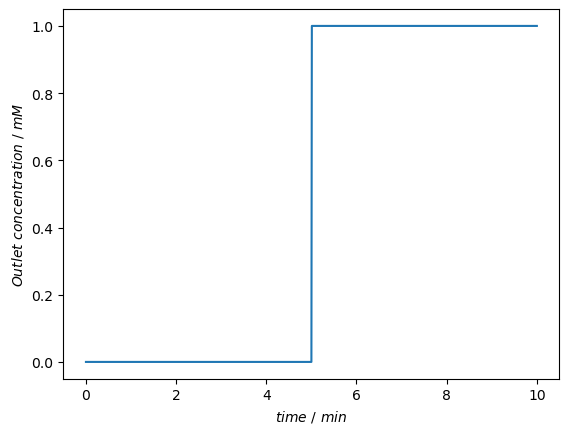

In [74]:
# Plotting the results of the inlet
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_001.solution_inlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

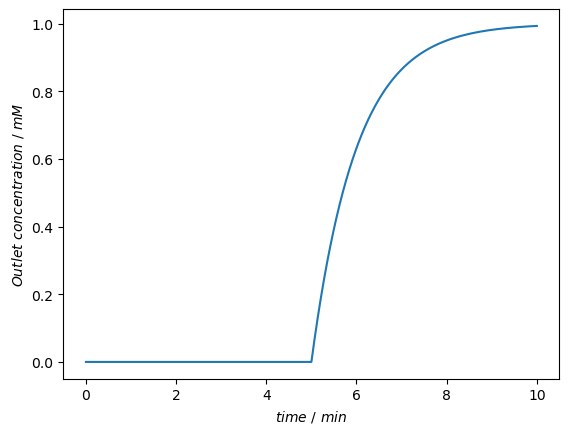

In [75]:
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_001.solution_outlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

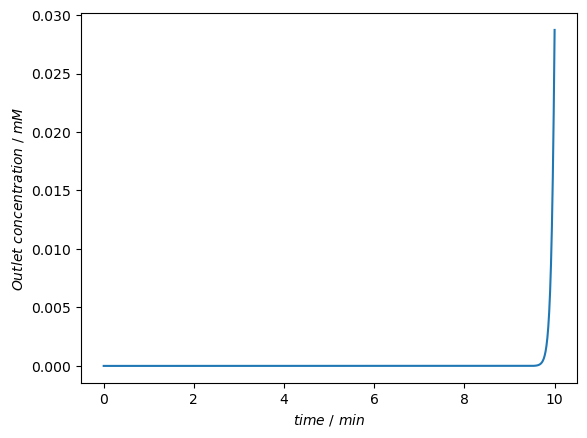

In [76]:
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_002.solution_outlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

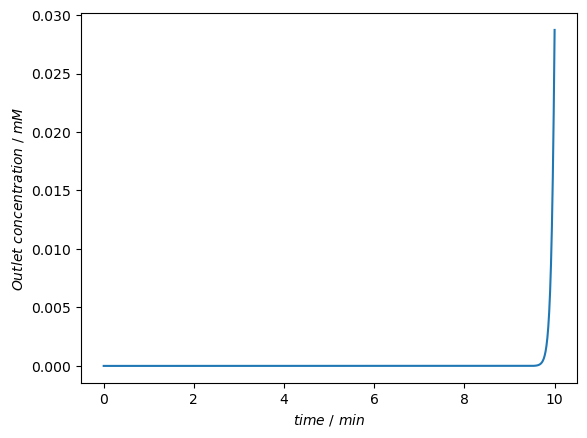

In [77]:
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_003.solution_outlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()